In [113]:
#import packages
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv("Data.csv")

In [114]:
#Sorting Values
df = df.sort_values(by='team_name', ascending=True)

In [115]:
#Adding the Home and Away Team
Home_Team = "FC Goa"
Away_Team = "Mumbai City FC"

In [116]:
#Getting the cumulative NPxG value of Home Team
hxG = df.loc[df['team_name']== Home_Team, ['xG']].sum(axis=1)
HomexG = round(hxG.sum(),2)

In [117]:
#Getting the cumulative NPxG value of Away Team
axG = df.loc[df['team_name']== Away_Team, ['xG']].sum(axis=1)
AwayxG = round(axG.sum(),2)

In [118]:
#Creating lists for every value of xG on different interval of time
a_xG = [0]
h_xG= [0]
a_min = [0]
h_min = [0]

In [119]:
#this finds our team names from the dataframe. 
hteam = df['team_name'].iloc[0]
ateam = df['team_name'].iloc[-1]

In [120]:
for x in range(len(df['xG'])):
    if df['team_name'][x]==ateam:
        a_xG.append(df['xG'][x])
        a_min.append(df['minutes'][x])
    if df['team_name'][x]==hteam:
        h_xG.append(df['xG'][x])
        h_min.append(df['minutes'][x])
        

In [121]:
#this is the function we use to make our xG values be cumulative rather than single shot values
#it goes through the list and adds the numbers together
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

In [122]:
a_cumulative = nums_cumulative_sum(a_xG)
h_cumulative = nums_cumulative_sum(h_xG)

In [123]:
#this is used to find the total xG. It just creates a new variable from the last item in the cumulative list
alast = round(a_cumulative[-1],2)
hlast = round(h_cumulative[-1],2)

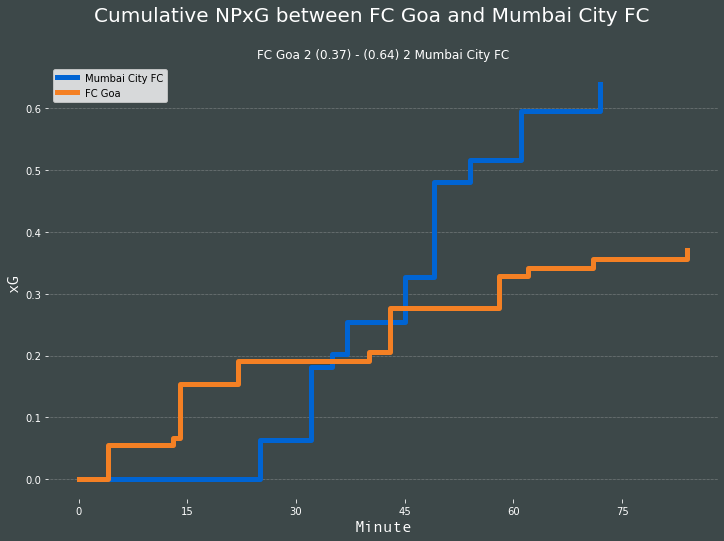

In [126]:

fig, ax = plt.subplots(figsize = (12,8))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

#set up our base layer
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)
        
plt.xticks([0,15,30,45,60,75,90])
plt.xlabel('Minute',fontname='Andale Mono',color='white',fontsize=16)
plt.ylabel('xG',fontname='Andale Mono',color='white',fontsize=16)

#plot the step graphs
ax.step(x=a_min,y=a_cumulative,color='#0064d3',label=ateam,linewidth=5,where='post')
ax.step(x=h_min,y=h_cumulative,color='#F48024',label=hteam,linewidth=5,where='post')
plt.suptitle(f"Cumulative NPxG between {Home_Team} and {Away_Team}",   fontsize=20, 
          color="white")
plt.title(f"{Home_Team} 2 ({HomexG}) - ({AwayxG}) 2 {Away_Team}", color="white")
plt.legend(loc = 'upper left')
plt.savefig('GoavsMumbaixG.jpg', dpi=300)